In [26]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from pandas.util.testing import assert_frame_equal
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
import pickle

In [106]:
start_date = '2020-01-01'
tickers = ['ITSA4.SA','BPAC5.SA','ABEV3.SA','VVAR3.SA','WEGE3.SA','OIBR3.SA','BBAS3.SA','AZUL4.SA','^BVSP']
end_date = datetime.date.today()
price = data.DataReader(tickers,'yahoo',start_date,end_date)
price.head()
adj_close = price['Adj Close']
adj_close.head()

Symbols,ITSA4.SA,BPAC5.SA,ABEV3.SA,VVAR3.SA,WEGE3.SA,OIBR3.SA,BBAS3.SA,AZUL4.SA,^BVSP
Date,,,,,,,,,
2020-01-02,14.049962,21.594137,19.200001,11.73,35.088482,0.86,53.052986,58.799999,118573.0
2020-01-03,13.844353,21.455460,18.930000,11.48,34.640415,0.86,52.964233,56.759998,117707.0
2020-01-06,13.814980,21.693193,19.020000,11.48,34.730030,0.92,52.264091,55.000000,116878.0
2020-01-07,13.628952,20.820000,19.059999,11.65,34.998871,0.94,51.869644,56.820000,116662.0
2020-01-08,13.423343,21.299999,18.969999,11.60,33.674587,0.92,51.396313,56.919998,116247.0


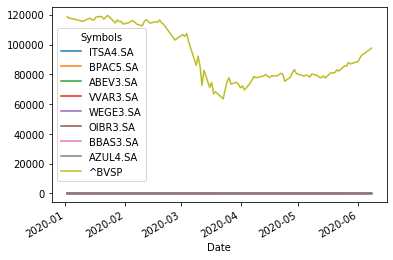

In [107]:
adj_close.plot()

Symbols,ITSA4.SA,BPAC5.SA,ABEV3.SA,VVAR3.SA,WEGE3.SA,OIBR3.SA,BBAS3.SA,AZUL4.SA,^BVSP
Date,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.014634,-0.006422,-0.014063,-0.021313,-0.012770,0.000000,-0.001673,-0.034694,-0.007304
2020-01-06,-0.002122,0.011080,0.004754,0.000000,0.002587,0.069767,-0.013219,-0.031008,-0.007043
2020-01-07,-0.013466,-0.040252,0.002103,0.014808,0.007741,0.021739,-0.007547,0.033091,-0.001848
2020-01-08,-0.015086,0.023055,-0.004722,-0.004292,-0.037838,-0.021277,-0.009125,0.001760,-0.003557


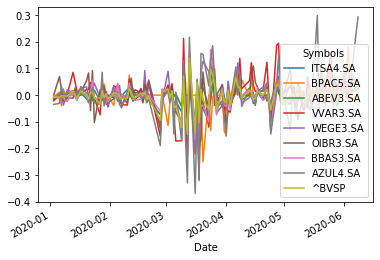

In [108]:
returns = adj_close.pct_change()
returns.plot()
returns.head()

[]

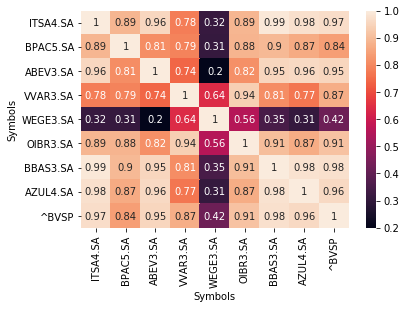

In [109]:
df = pd.DataFrame(adj_close)
df2 = pd.DataFrame(returns)
corrMatrix_price = df.corr()
corrMatrix_ret = df2.corr()
hmap_price = sn.heatmap(corrMatrix_price,annot = True)
hmap_price.plot()

[]

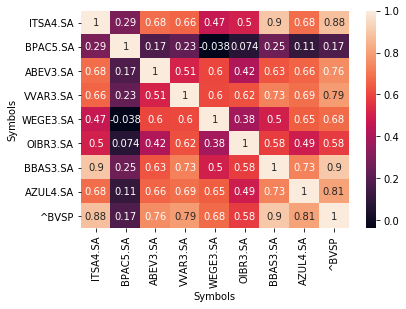

In [110]:
hmap_ret = sn.heatmap(corrMatrix_ret,annot = True)
hmap_ret.header = tickers
hmap_ret.plot()

In [111]:
returns.describe()

Symbols,ITSA4.SA,BPAC5.SA,ABEV3.SA,VVAR3.SA,WEGE3.SA,OIBR3.SA,BBAS3.SA,AZUL4.SA,^BVSP
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,-0.002172,0.000138,-0.001902,0.006107,0.003681,0.001678,-0.002079,-0.002028,-0.001006
std,0.036379,0.049623,0.036531,0.081561,0.047663,0.057090,0.054314,0.098668,0.040273
min,-0.108654,-0.250125,-0.157818,-0.315341,-0.206197,-0.202899,-0.166895,-0.368677,-0.147797
25%,-0.021216,-0.006869,-0.019250,-0.019171,-0.020287,-0.020306,-0.025550,-0.031650,-0.012507
50%,-0.001618,0.000000,-0.000413,0.013235,0.007815,0.000000,-0.003125,0.000517,0.000512
75%,0.019563,0.010704,0.014849,0.041432,0.025791,0.031250,0.019724,0.025720,0.016365
max,0.100324,0.181212,0.098712,0.212944,0.126697,0.130435,0.171261,0.298737,0.139082


In [112]:
beta_single = corrMatrix_ret['^BVSP']
x = len(corrMatrix_ret) 
weights = []
for i in range(x):
    weights.append(1/x)
weights

[0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111,
 0.1111111111111111]

In [113]:
beta = beta_single.dot(weights)
beta

0.7293437183108786